<h1><b>Hi, can you make a small tutorial in which you can show how to make figures in a panel e.g. 3 rows and 3 columns. I am trying matplotlib and cartopy but I have a problem with map projections and colorbar. I want same colorbar for my figures and I also need a map on the figure. I have tried but it's not working. If you can just show simple netcdf example it will be very helpful .Thank you!</b></h1>

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from cartopy import crs, feature 

In [2]:
ds_data = xr.open_dataset('rainfall.nc')

seas_ds = ds_data.resample(time='M').sum('time').groupby('time.month').mean('time')['pr'] * 86400

In [3]:
ds_data.close()

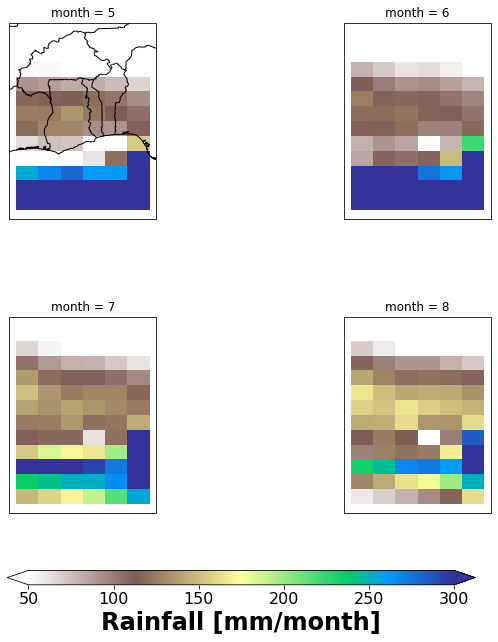

In [18]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10), subplot_kw={'projection':crs.PlateCarree()})
plt.subplots_adjust(bottom=0.2, wspace=0.5, hspace=0.5)

seas_ds[4].plot(ax = axes[0, 0], add_colorbar=False, vmin=50, vmax=300, cmap='terrain_r')
axes[0, 0].coastlines()
axes[0,0].add_feature(feature.BORDERS)


seas_ds[5].plot(ax = axes[0, 1], add_colorbar=False, vmin=50, vmax=300, cmap='terrain_r')

seas_ds[6].plot(ax = axes[1, 0], add_colorbar=False, vmin=50, vmax=300, cmap='terrain_r')

cb = seas_ds[7].plot(ax = axes[1, 1], add_colorbar=False, vmin=50, vmax=300, cmap='terrain_r')


cax = fig.add_axes([0.175, 0.1, 0.65, 0.02])
cbar = fig.colorbar(cb, cax = cax, orientation='horizontal', extend='both', 
                )
cbar.ax.tick_params(labelsize=16)
cbar.set_label(label='Rainfall [mm/month]', size=24, weight='bold',)
